### Victor Rene Pérez Mayen
### 19005180
#### Tarea No.6

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import random

In [3]:
df_1 = pd.read_csv("data.csv")
print(df_1.shape)
df_1

(200, 3)


,x1,x2,label
0,12.882292,10.228199,1
1,12.682271,9.360462,1
2,12.104981,10.580729,1
3,12.473947,10.993459,1
4,11.997386,9.321291,1
5,12.336784,10.223694,1
6,4.362612,5.437437,0
7,14.102062,9.906739,1
8,14.419988,8.388830,1
9,5.233269,6.449121,0


In [4]:
min_age_x1 = df_1["x1"].min()
dif_age_x1 = df_1["x1"].max() - min_age_x1
df_1["x1"] = df_1["x1"].apply(lambda row: (row - min_age_x1) / dif_age_x1)

min_age_x2 = df_1["x2"].min()
dif_age_x2 = df_1["x2"].max() - min_age_x2
df_1["x2"] = df_1["x2"].apply(lambda row: (row - min_age_x2) / dif_age_x2)

In [5]:
print(df_1["x1"],df_1["x2"])

0      0.783695
1      0.767705
2      0.721553
3      0.751050
4      0.712952
         ...   
195    0.742350
196    0.968994
197    0.808103
198    0.765459
199    0.860417
Name: x1, Length: 200, dtype: float64 0      0.804565
1      0.683183
2      0.853878
3      0.911612
4      0.677704
         ...   
195    0.631922
196    0.602725
197    0.507280
198    0.544070
199    0.818989
Name: x2, Length: 200, dtype: float64


In [28]:
#Funcion de entrenamiento
def func_ent(x, w, label, lr):
    y = random.randrange(0, 199)
    z = label[y]
    dot = np.matmul(x[y], w)
    if ((z == 1) & (dot < 0)):
        w = w + lr*x[y]
    elif ((z == 0) & (dot >= 0)):
        w = w - lr*x[y]
    return w

def grafo(x, y, w):
    plt.scatter(x["x1"], x["x2"], c = "b", alpha = 0.5)
    plt.title("Resultado")
    plt.plot([0, -(w[0])/w[2]], [-(w[0])/w[1], 0], linestyle = '-', marker='o')
    plt.show()
    return

def perceptron(inputs, lr):
    w = np.random.normal(0, 0.1, size = (3,))
    y = inputs["label"]
    x = inputs[["x1", "x2"]]
    x.insert(0, "x3", 1)
    while True:
        w = func_ent(x.values, w, y.values, lr)
        y_hat = (np.matmul(x.values, w) >=0).astype(int)
        if np.all(y_hat == y.values):
            break
    grafo(x, y, w)
    return w

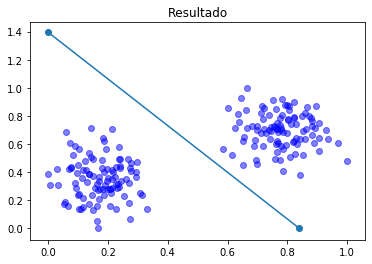

[-0.02247939  0.01610752  0.02680306]


In [29]:
w = perceptron(df_1, 0.0001)
print(w)